In [ ]:
#Connect Google Drive to colab

from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/images.zip /content
!cp /content/drive/MyDrive/features.pickle /content
!cp /content/drive/MyDrive/filenames.pickle /content

In [ ]:
#unzip all content of image folders
! unzip '/content/images.zip'


Archive:  /content/images.zip
   creating: images/Ainsworth_Dyer/
  inflating: images/Ainsworth_Dyer/Ainsworth_Dyer_0001.jpg  
   creating: images/Alex_Popov/
  inflating: images/Alex_Popov/Alex_Popov_0001.jpg  
   creating: images/Alexander_Payne/
  inflating: images/Alexander_Payne/Alexander_Payne_0001.jpg  
   creating: images/Alison_Lohman/
  inflating: images/Alison_Lohman/Alison_Lohman_0001.jpg  
  inflating: images/Alison_Lohman/Alison_Lohman_0002.jpg  
   creating: images/Amer_al-Saadi/
  inflating: images/Amer_al-Saadi/Amer_al-Saadi_0001.jpg  
  inflating: images/Amer_al-Saadi/Amer_al-Saadi_0002.jpg  
  inflating: images/Amer_al-Saadi/Amer_al-Saadi_0003.jpg  
  inflating: images/Amer_al-Saadi/Amer_al-Saadi_0004.jpg  
   creating: images/Andre_Smith/
  inflating: images/Andre_Smith/Andre_Smith_0001.jpg  
   creating: images/Angel_Maza/
  inflating: images/Angel_Maza/Angel_Maza_0001.jpg  
   creating: images/Angela_Lansbury/
  inflating: images/Angela_Lansbury/Angela_Lansbury_00

In [ ]:
#Assign paths to the given variables 
#Use pickle to convert a Python object into a byte stream to store it in a file/database

filenames_path = '/content/filenames.pickle'
features_path = '/content/features.pickle'
images_folder_path = '/content/images'

In [ ]:
#Import the requuired plugins and packages that will be needed
import pickle
import numpy as np
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [ ]:
import os
import pickle
import tensorflow
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Keep all image extensions to .jpg
extensions = ['.jpg']

#function to list all the files in the directory and then sorting it
def ListFile(root_dir):
    file_lists = []
    counter = 1

    for root, dirs, filenames in os.walk(root_dir):
        for filename in tqdm(filenames):
            if any(ext in filename for ext in extensions):
                file_lists.append(os.path.join(root, filename))
                counter += 1
    return sorted(file_lists)

#feat Stor function is the function that opens filenames.pickle and features.pickle files 
def featStor():
    stored_filenames = pickle.load(open(filenames_path, 'rb'))
    stored_feature_list = pickle.load(open(features_path, 'rb'))
    return stored_filenames, stored_feature_list

#vf function calls the featStor functinos and then transform the feature and then fit it within the results and then load that image in to an array 
def vf():
    filenames, features = featStor()
    num_feature_dimensions = 100 
    pca = PCA(n_components=num_feature_dimensions)
    pca.fit(features)
    feature_list_compressed = pca.transform(features)
    ttssne = TSNE(n_components=2, verbose=1, n_iter=4000, metric='cosine', init='pca')
    ttssne_results = ttssne.fit_transform(feature_list_compressed)
    ttssne_results = StandardScaler().fit_transform(ttssne_results)
    size = (45, 45) #keep size of image to 45,45
    imgs = [img_to_array(load_img(path, target_size=size)) / 255 for path in filenames]
    vscatImg(ttssne_results, imgs=imgs, size=size, zoom=0.7)

#vscatImg is a function that zips the data into images 
def vscatImg(data, imgs, size=(28, 28), zoom=1):
    fig, axx = plt.subplots(figsize=size)
    artistt = []
    for ab, i in tqdm(zip(data, imgs)):
        x, y = ab
        img = OffsetImage(i, zoom=zoom)
        ab = AnnotationBbox(img, (x, y), abcoords='data', frameon=False)
        artistt.append(axx.add_artistt(ab))
    axx.update_datalim(data)
    axx.autoscale()
    axx.axis('off')
    plt.tight_layout(pad=1.2)
    plt.show()


In [ ]:
import pickle

import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

def extfts(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    f = model.predict(x)
    return f.flatten()


def extDtFts():
    file_lists = ListFile(images_folder_path)
    feature_list = []

    for filename in tqdm(file_lists):
        feature_list.append(extfts(filename))

    return file_lists, feature_list


def updFtrs():
    file_lists, features = extDtFts()

    pickle.dump(file_lists, open(filenames_path, 'wb'))
    pickle.dump(features, open(features_path, 'wb'))

    return file_lists, features


if __name__ == "__main__":
    updFtrs()

83697664/83683744 [==============================] - 1s 0us/step


0it [00:00, ?it/s]
 76%|███████▌  | 183/241 [00:25<00:04, 12.07it/s]

In [ ]:
import sys
import matplotlib.pyplot as plt
from scipy import spatial
from random import shuffle


def visSimImg(img_paths, max_query_imgs=10, max_matches=20):
    img_paths = img_paths[:min(max_query_imgs, len(img_paths))]
    fig, axs = plt.subplots(len(img_paths), max_matches + 1, figsize=(30, 35))

    for i in tqdm(range(len(img_paths))):
        img_path = img_paths[i]
        similar = SimImgPth(img_path, max_imgs=max_matches)

        __pltSim__(axs[i], img_path, similar)

    plt.tight_layout(h_pad=2)
    plt.show()


def __pltSim__(axxs, img_path, similar):
    axxx[0].set_title('Query', size=10)
    axxs[0].imshow(img_to_array(load_img(img_path)) / 255)
    axxs[0].axis('off')
    axxs[0].autoscale()

    cnt = 1
    for path, simlrty in similar:
        axxs[cnt].imshow(img_to_array(load_img(path)) / 255)
        axxs[cnt].set_title('Related\n similr %f' % (simlrty,), size=10)
        axxs[cnt].axis('off')
        axxs[cnt].autoscale()
        cnt += 1


def SimImgPth(img_path, max_imgs=4):
    query_features = extfts(img_path)
    stored_features = featStor()

    max_imgs = min(max_imgs, len(stored_features[0]))
    similarities_arr = []

    for filename, encoding in list(zip(*stored_features)):
        h_dist = spatial.distance.hamming(query_features, encoding)
        c_dist = spatial.distance.cosine(query_features, encoding)
        simlrty = 1 - (h_dist + c_dist) / 2
        similarities_arr.append((filename, simlrty))

    similarities_arr.sort(key=lambda tup: -tup[1])
    return similarities_arr[:max_imgs]


if __name__ == "__main__":
    
        paths = ListFile(images_folder_path)
        shuffle(paths)
        visSimImg(paths)

# Part 2
Restart Jupyter kernel

In [ ]:
! pip install --upgrade elastiknn-client

In [ ]:
from elastiknn import models
from IPython.core.display import Image
import elastiknn
from elastiknn.client import ElastiknnClient
from elastiknn.utils import ndarray_to_dense_float_vectors
from elastiknn.api import Vec, NearestNeighborsQuery
import elasticsearch
import numpy as np
import pickle

es = elasticsearch.Elasticsearch("http://67.202.45.16:9200", http_auth=('elastic','cs370g12elastic'))
client = ElastiknnClient(es)

In [ ]:
with open("/content/filenames.pickle", 'rb') as filefd:
    with open("/content/features.pickle", 'rb') as featuresfd:
        file_lists = pickle.load(filefd)
        features = pickle.load(featuresfd)

In [ ]:
knn_model = models.ElastiknnModel(algorithm="exact", metric="cosine", es=es)
knn_model.fit(np.array(features))

index was not given, using elastiknn-1651018104 instead


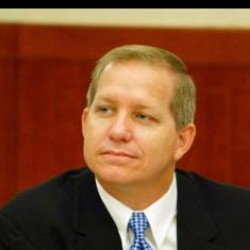

Query Image: 1


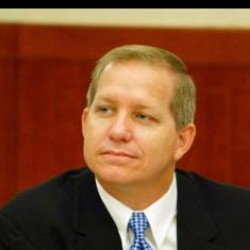

Image: 1 
Similarity: 1.0


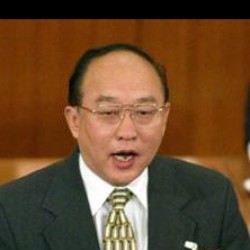

Image: 239 
Similarity: 0.9196556


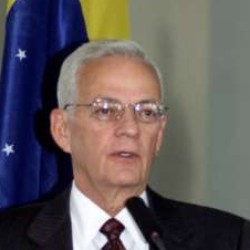

Image: 174 
Similarity: 0.9177188000000001


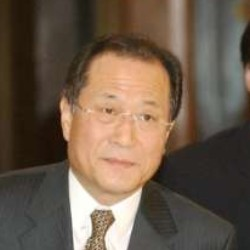

Image: 92 
Similarity: 0.9160326999999999


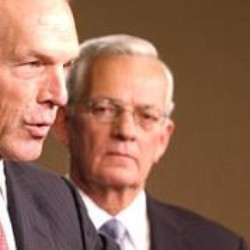

Image: 171 
Similarity: 0.9052309999999999


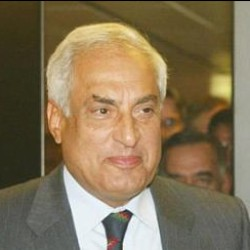

Image: 6 
Similarity: 0.901219


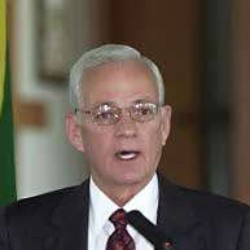

Image: 176 
Similarity: 0.9005129999999999


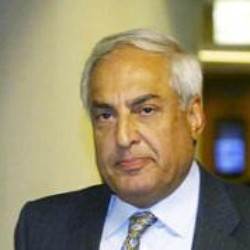

Image: 5 
Similarity: 0.8996717000000001


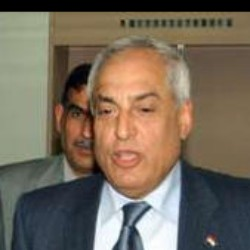

Image: 8 
Similarity: 0.8991513


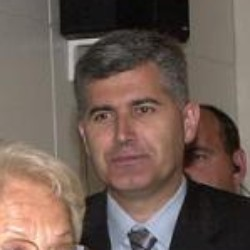

Image: 42 
Similarity: 0.8966193


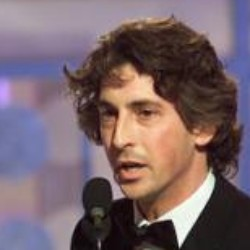

Query Image: 2


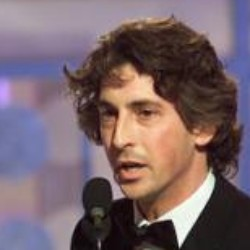

Image: 2 
Similarity: 1.0


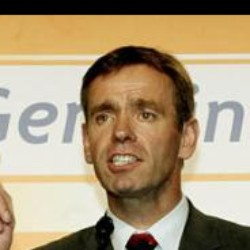

Image: 149 
Similarity: 0.8486507999999999


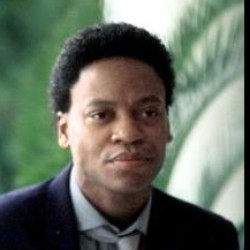

Image: 230 
Similarity: 0.8328319


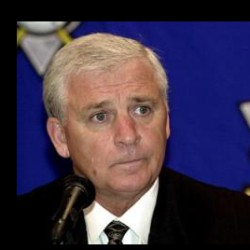

Image: 20 
Similarity: 0.8306826


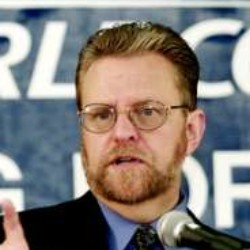

Image: 109 
Similarity: 0.8284575999999999


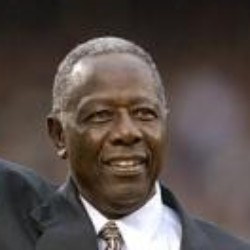

Image: 56 
Similarity: 0.8068249000000001


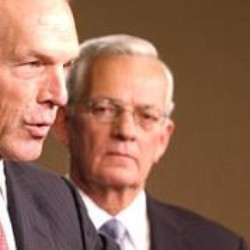

Image: 171 
Similarity: 0.797264


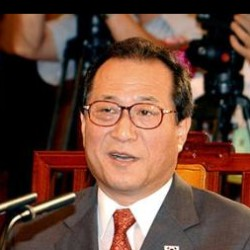

Image: 86 
Similarity: 0.7943845


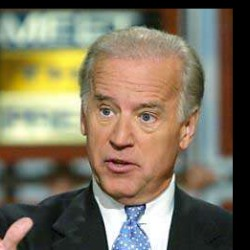

Image: 117 
Similarity: 0.7889485


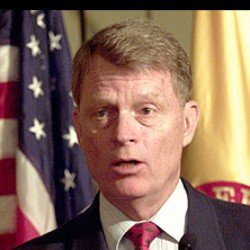

Image: 181 
Similarity: 0.786583


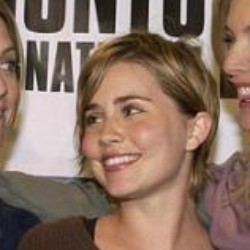

Query Image: 3


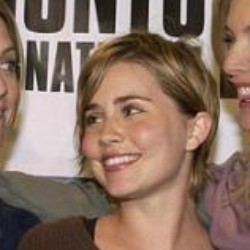

Image: 3 
Similarity: 1.0


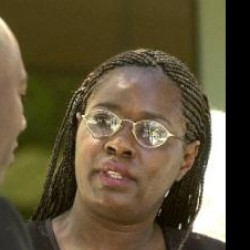

Image: 232 
Similarity: 0.6948334


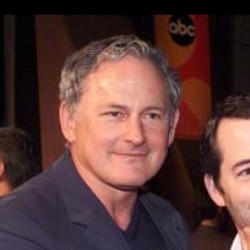

Image: 233 
Similarity: 0.6864436


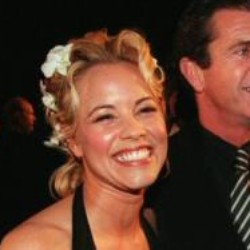

Image: 134 
Similarity: 0.6849916


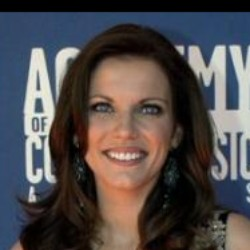

Image: 140 
Similarity: 0.6800241


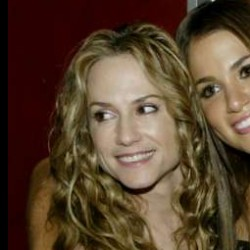

Image: 64 
Similarity: 0.679932


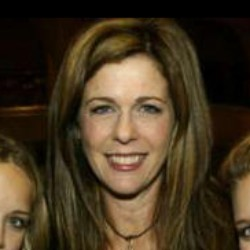

Image: 189 
Similarity: 0.6690343999999999


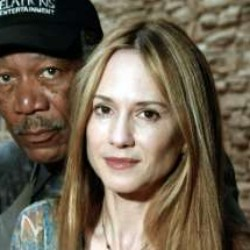

Image: 67 
Similarity: 0.6665483000000001


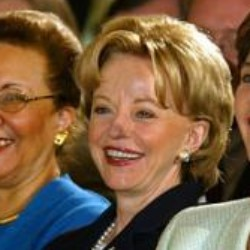

Image: 131 
Similarity: 0.6661383999999999


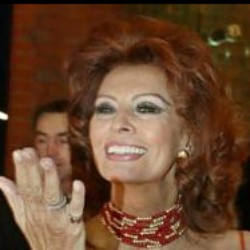

Image: 213 
Similarity: 0.6649316999999999


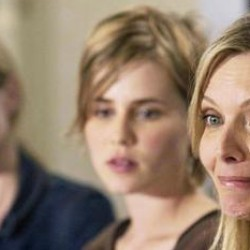

Query Image: 4


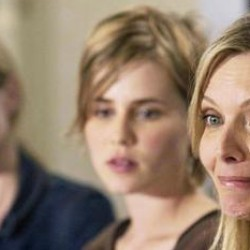

Image: 4 
Similarity: 1.0


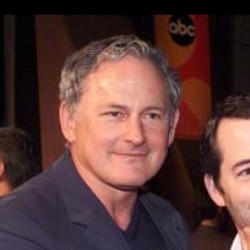

Image: 233 
Similarity: 0.7260173999999999


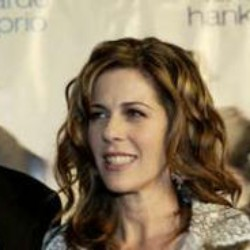

Image: 191 
Similarity: 0.7027080000000001


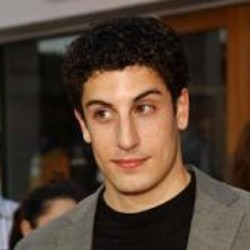

Image: 82 
Similarity: 0.7023306


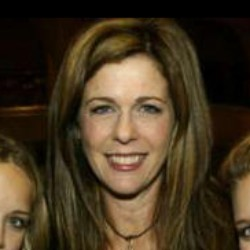

Image: 189 
Similarity: 0.6802954999999999


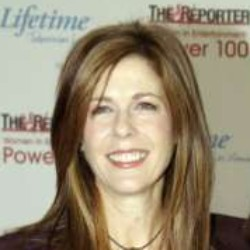

Image: 190 
Similarity: 0.6753085000000001


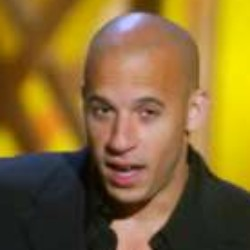

Image: 235 
Similarity: 0.6752184999999999


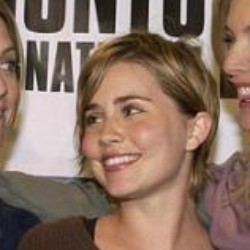

Image: 3 
Similarity: 0.6633842999999999


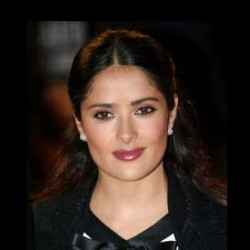

Image: 207 
Similarity: 0.6624973999999999


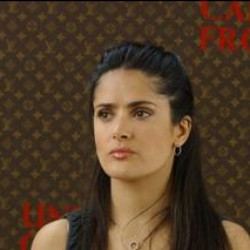

Image: 201 
Similarity: 0.6551541000000001


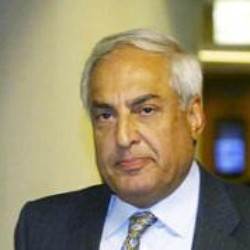

Query Image: 5


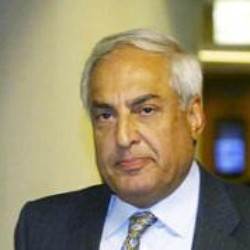

Image: 5 
Similarity: 1.0


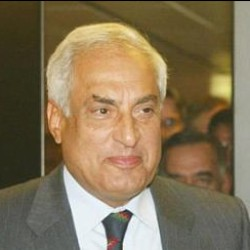

Image: 6 
Similarity: 0.9368612999999999


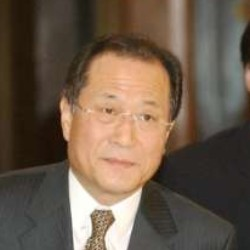

Image: 92 
Similarity: 0.9280645999999999


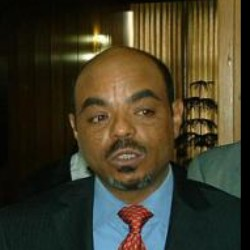

Image: 151 
Similarity: 0.9272047999999999


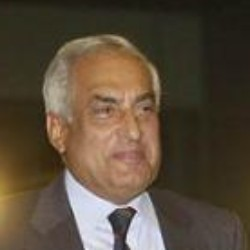

Image: 7 
Similarity: 0.9254894


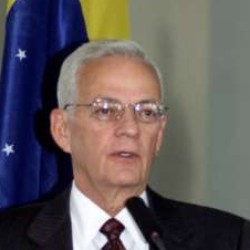

Image: 174 
Similarity: 0.919505


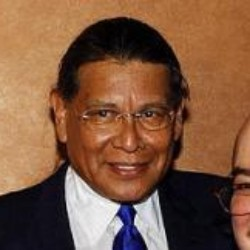

Image: 14 
Similarity: 0.9135754


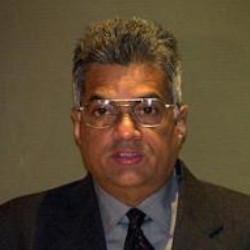

Image: 184 
Similarity: 0.9131571


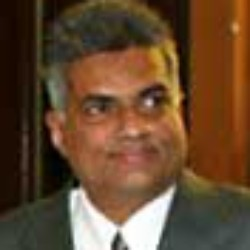

Image: 182 
Similarity: 0.9077299000000001


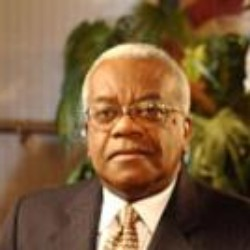

Image: 229 
Similarity: 0.9003104


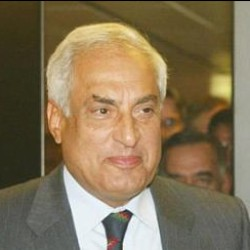

Query Image: 6


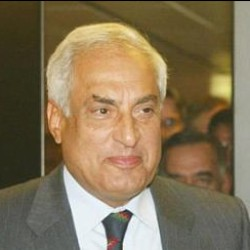

Image: 6 
Similarity: 1.0


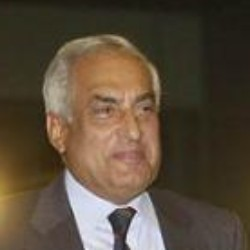

Image: 7 
Similarity: 0.9585173


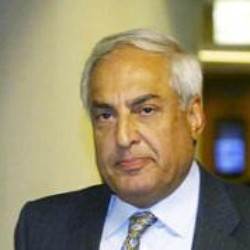

Image: 5 
Similarity: 0.9368612999999999


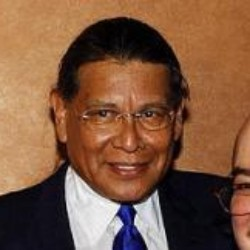

Image: 14 
Similarity: 0.9313723


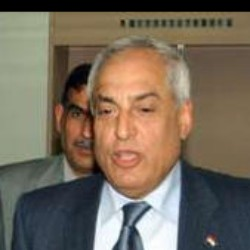

Image: 8 
Similarity: 0.9235237000000001


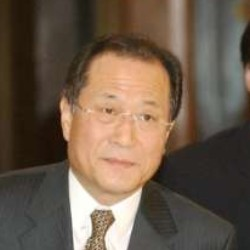

Image: 92 
Similarity: 0.9233218000000001


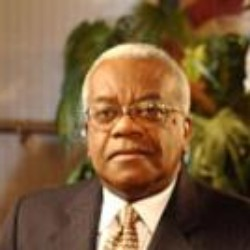

Image: 229 
Similarity: 0.9223052


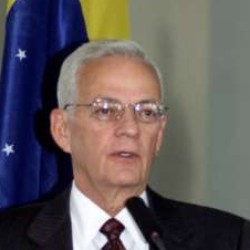

Image: 174 
Similarity: 0.922269


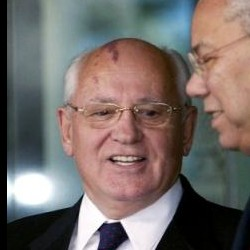

Image: 154 
Similarity: 0.9170693999999999


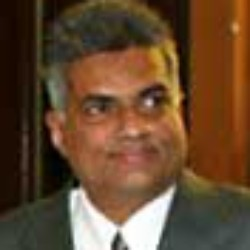

Image: 182 
Similarity: 0.9097251


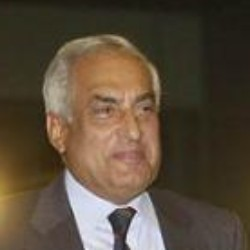

Query Image: 7


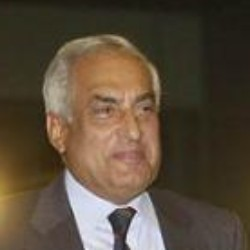

Image: 7 
Similarity: 1.0


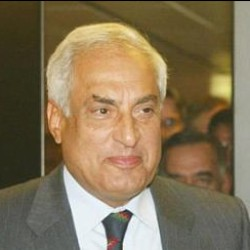

Image: 6 
Similarity: 0.9585173


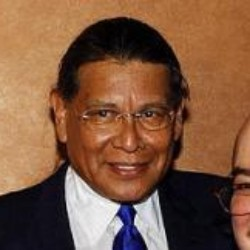

Image: 14 
Similarity: 0.9264475000000001


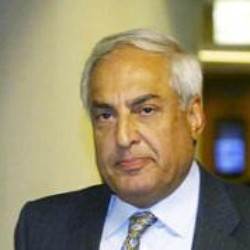

Image: 5 
Similarity: 0.9254894


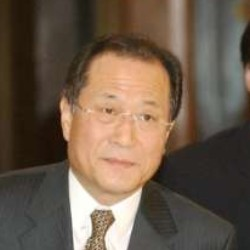

Image: 92 
Similarity: 0.9183209000000001


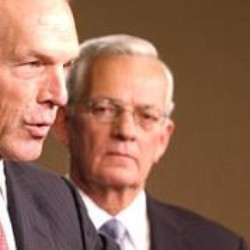

Image: 171 
Similarity: 0.9134367999999999


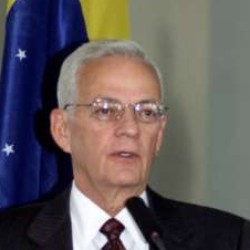

Image: 174 
Similarity: 0.9101478000000001


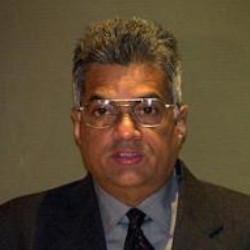

Image: 184 
Similarity: 0.9079216999999999


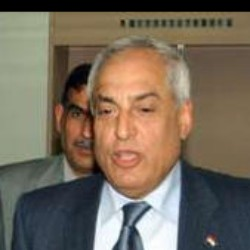

Image: 8 
Similarity: 0.9066671


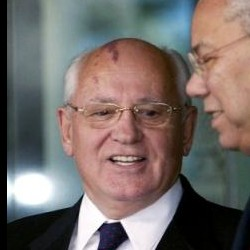

Image: 154 
Similarity: 0.9058626999999999


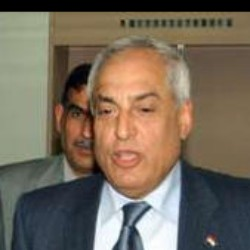

Query Image: 8


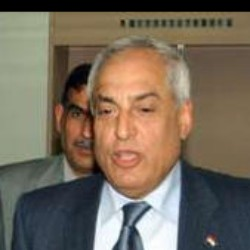

Image: 8 
Similarity: 1.0


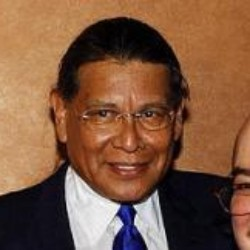

Image: 14 
Similarity: 0.938596


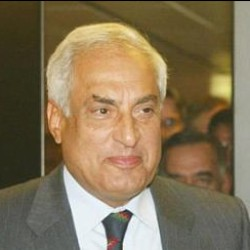

Image: 6 
Similarity: 0.9235237000000001


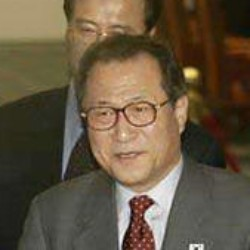

Image: 90 
Similarity: 0.9129003


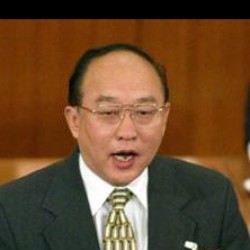

Image: 239 
Similarity: 0.9072808000000001


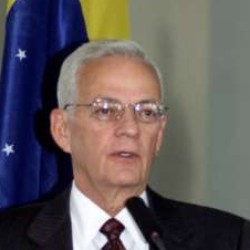

Image: 174 
Similarity: 0.9072678999999999


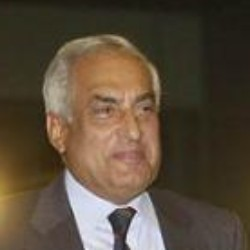

Image: 7 
Similarity: 0.9066671


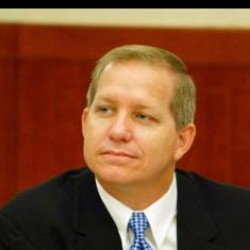

Image: 1 
Similarity: 0.8991513


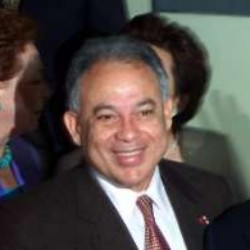

Image: 118 
Similarity: 0.8980699999999999


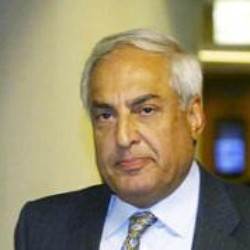

Image: 5 
Similarity: 0.8976637000000001


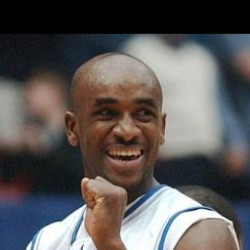

Query Image: 9


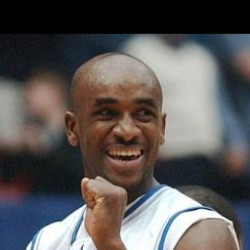

Image: 9 
Similarity: 1.0


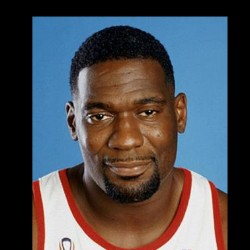

Image: 208 
Similarity: 0.6859774999999999


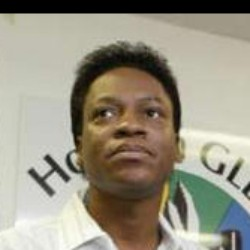

Image: 231 
Similarity: 0.6838850000000001


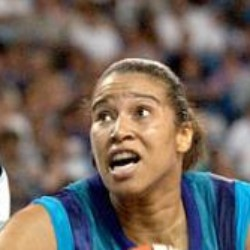

Image: 160 
Similarity: 0.6804941


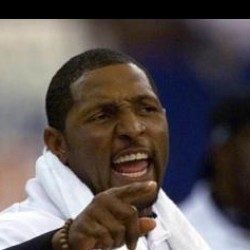

Image: 186 
Similarity: 0.6691186


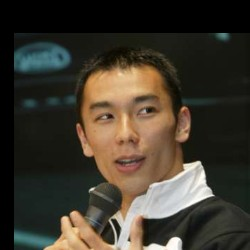

Image: 221 
Similarity: 0.6623905999999999


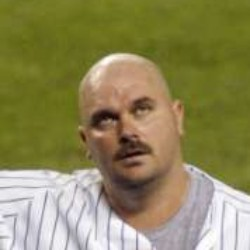

Image: 35 
Similarity: 0.6563064999999999


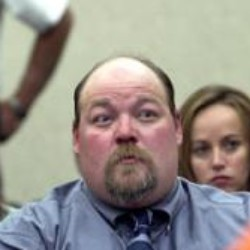

Image: 152 
Similarity: 0.6489670999999999


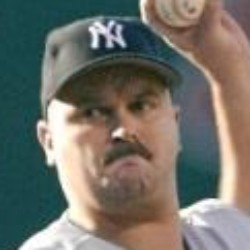

Image: 36 
Similarity: 0.6470199000000001


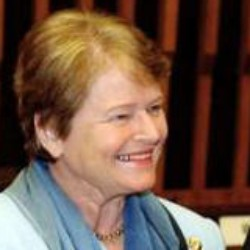

Image: 54 
Similarity: 0.6356200000000001


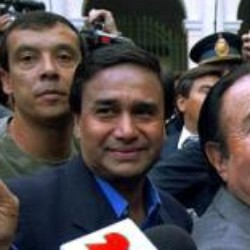

Query Image: 10


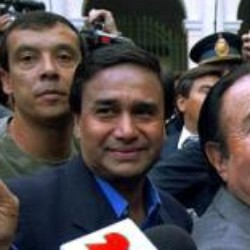

Image: 10 
Similarity: 1.0


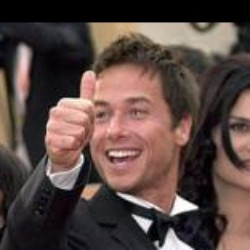

Image: 218 
Similarity: 0.7517480000000001


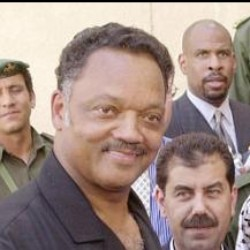

Image: 94 
Similarity: 0.7483575


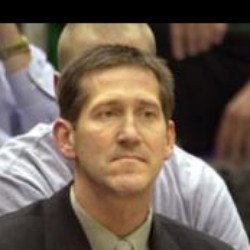

Image: 84 
Similarity: 0.7348064999999999


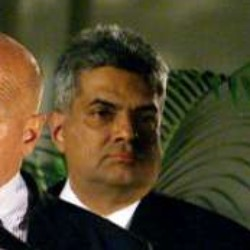

Image: 183 
Similarity: 0.7312695


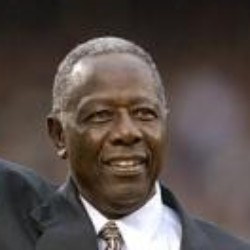

Image: 56 
Similarity: 0.7233357


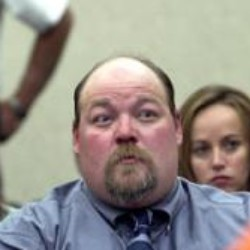

Image: 152 
Similarity: 0.7199850000000001


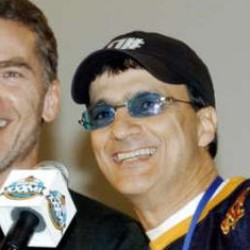

Image: 105 
Similarity: 0.7194444


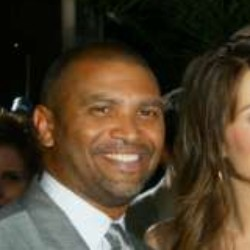

Image: 188 
Similarity: 0.7107703999999999


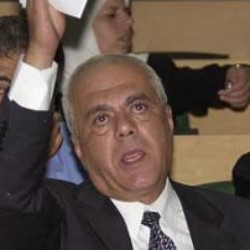

Image: 222 
Similarity: 0.7103349000000001


In [ ]:
for i in range(1,11):    
    query_image_index = i
    num_neighbors = 10

    ret = knn_model.kneighbors([Vec.DenseFloat(values=features[query_image_index].tolist())], n_neighbors=num_neighbors, return_similarity=True)

    display(Image(filename=file_lists[query_image_index]))
    print(f"Query Image: {query_image_index}")

    for i in range(len(ret[0][0])):
        display(Image(filename=file_lists[ret[0][0][i]]))
        print(f"Image: {ret[0][0][i]} \nSimilarity: {ret[1][0][i] - 1}")